# 1. Autocorrelation

'babies.zip` contains baby name frequencies per year (one file per year). You can treat each baby name as a time series.

1. Get the autocorrelation and partial autocorrelation for the names `Olivia`, `Newton` and `John`.

2. Which name do you expect to be the most popular in 2022? Use an ARIMA model and backtesting to pick 3 interesting candidates. Support your findings with a plot

In [212]:
from os import listdir
from os.path import isfile, join
import pandas as pd 
import numpy as np 
import re 
from datetime import datetime
import seaborn as sns 
sns.set_theme()

path='C:\\Users\\kevin\\Desktop\\DataScience\\Module 5\\5-5-time-series\\data\\babies\\'

onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]

onlyfiles=onlyfiles[1:]

df=pd.DataFrame()


for txt_file in onlyfiles:
    a=np.loadtxt(path+txt_file,unpack=True,dtype='str',delimiter=',').T
    year=str(re.sub("[^0-9]", "", txt_file))
    df_i=pd.DataFrame(a,columns=['name','sex','N'])
    df_i['year']=year
    
    df=pd.concat([df, df_i],ignore_index=True)
df.N=df.N.astype(int)
df=df.set_index('year')


In [213]:
df.index=pd.to_datetime(df.index,format='%Y%', errors='ignore')




In [214]:
df.index

DatetimeIndex(['1880-01-01', '1880-01-01', '1880-01-01', '1880-01-01',
               '1880-01-01', '1880-01-01', '1880-01-01', '1880-01-01',
               '1880-01-01', '1880-01-01',
               ...
               '2016-01-01', '2016-01-01', '2016-01-01', '2016-01-01',
               '2016-01-01', '2016-01-01', '2016-01-01', '2016-01-01',
               '2016-01-01', '2016-01-01'],
              dtype='datetime64[ns]', name='year', length=1891894, freq=None)

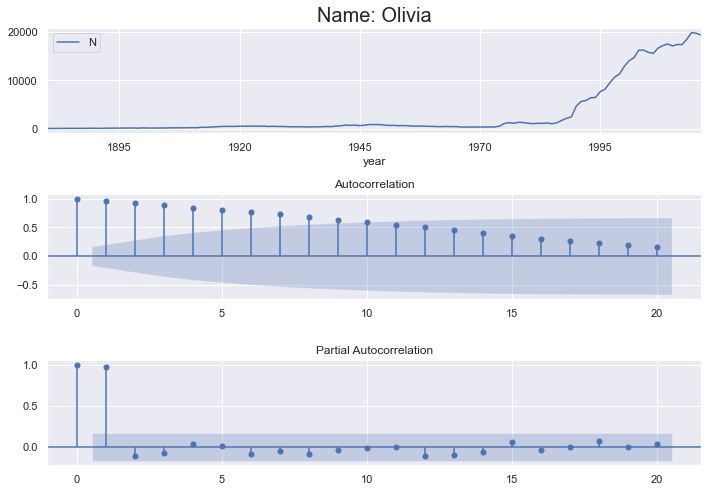

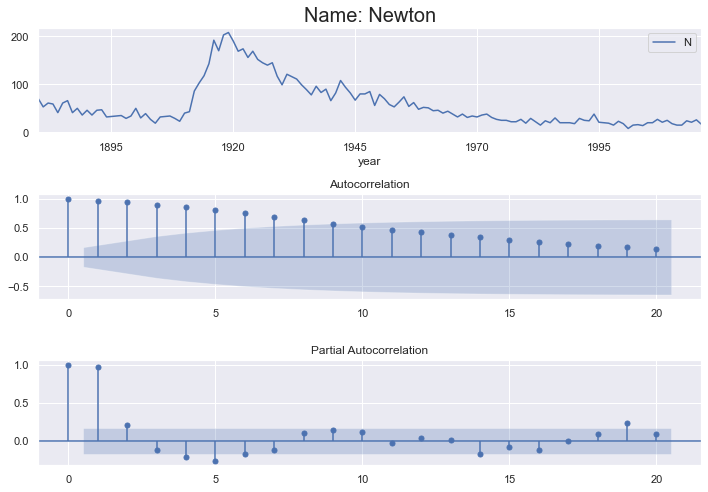

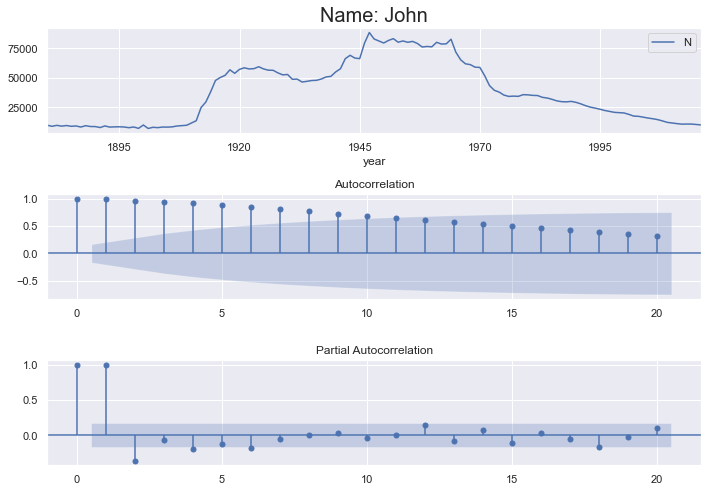

In [215]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


NAMES=['Olivia','Newton','John']

for NAME in NAMES:
    fid, (ax1,ax2,ax3)=plt.subplots(3,1,figsize=(10,7))

    df_name=df.loc[df.name==NAME].groupby('year').sum()
    df_name.plot(ax=ax1,title=F'Name: {NAME}')
    ax1.title.set_size(20)
    plot_acf(df_name.N, lags=20,ax=ax2)
    plot_pacf(df_name.N, lags=20,ax=ax3)
    plt.tight_layout()
plt.show()

In [216]:
Popular_names=df.loc[df.index>'2012'].groupby('name').sum().N.nlargest(5).index.values

In [217]:
df.loc[df.index>'2012']

,name,sex,N
year,,,
2013-01-01,Sophia,F,21193
2013-01-01,Emma,F,20921
2013-01-01,Olivia,F,18405
2013-01-01,Isabella,F,17617
2013-01-01,Ava,F,15236
...,...,...,...
2016-01-01,Zolton,M,5
2016-01-01,Zurich,M,5
2016-01-01,Zyahir,M,5


In [218]:
Popular_names

array(['Emma', 'Olivia', 'Noah', 'Sophia', 'Liam'], dtype=object)

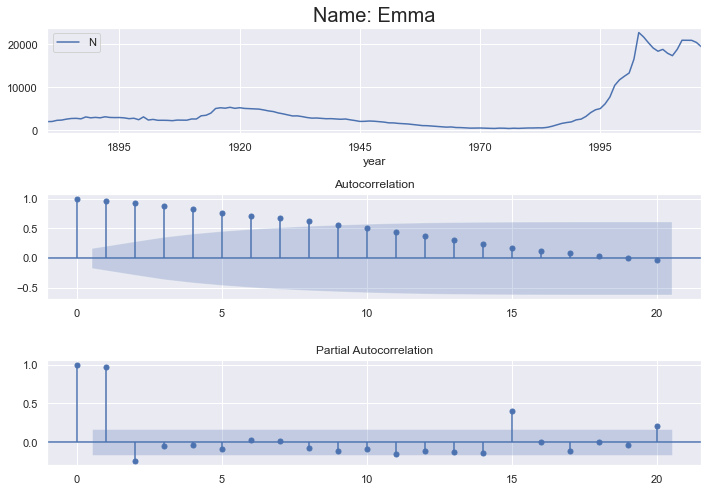

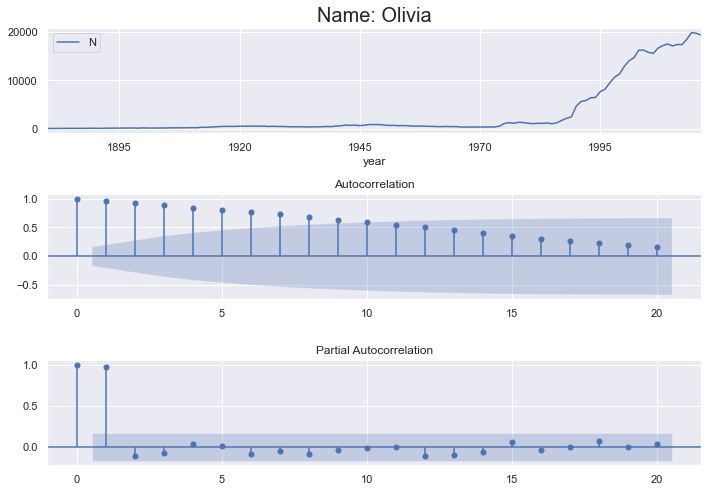

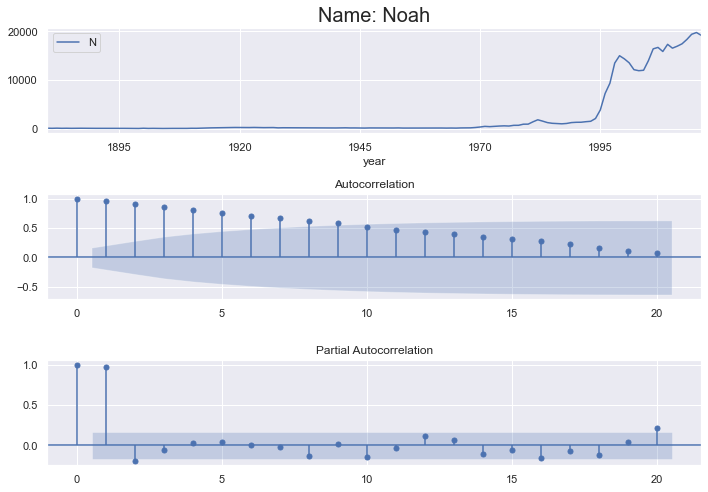

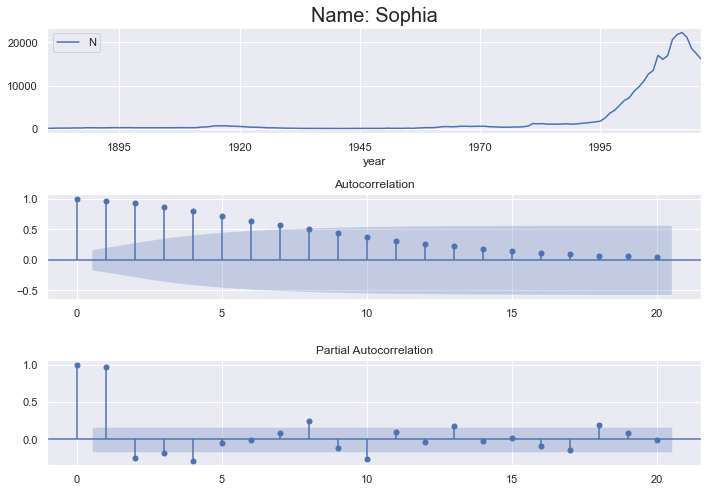

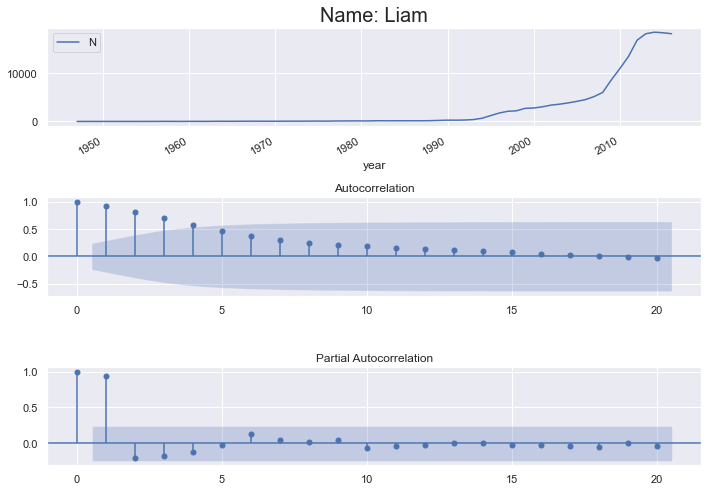

In [219]:
NAMES=Popular_names

for NAME in NAMES:
    fid, (ax1,ax2,ax3)=plt.subplots(3,1,figsize=(10,7))

    df_name=df.loc[df.name==NAME].groupby('year').sum()
    df_name.plot(ax=ax1,title=F'Name: {NAME}')
    ax1.title.set_size(20)
    plot_acf(df_name.N, lags=20,ax=ax2)
    plot_pacf(df_name.N, lags=20,ax=ax3)
    plt.tight_layout()
plt.show()

C:\Users\kevin\Anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\kevin\Anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so in

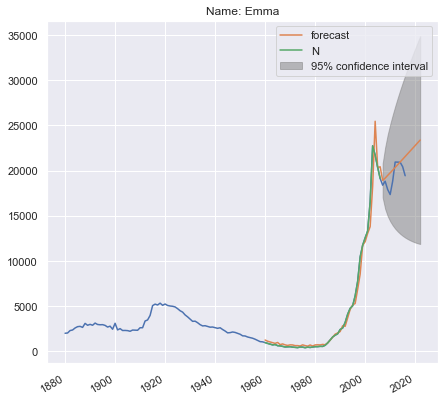

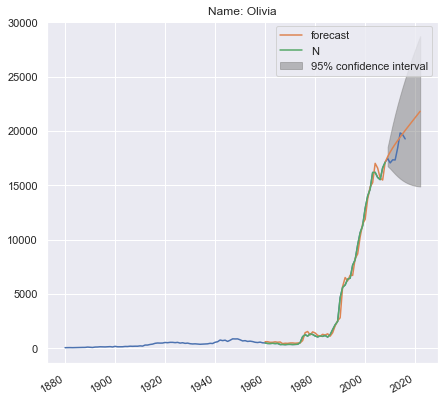

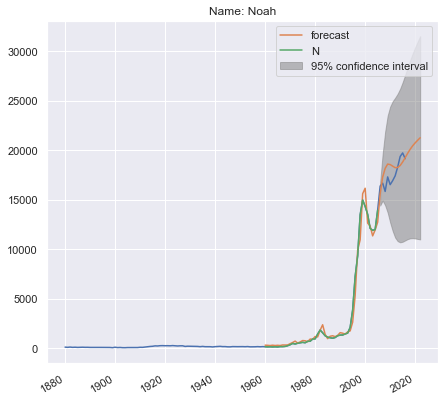

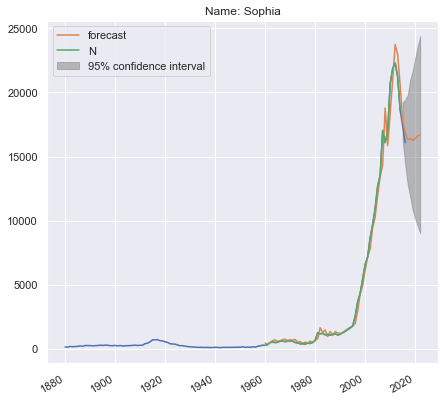

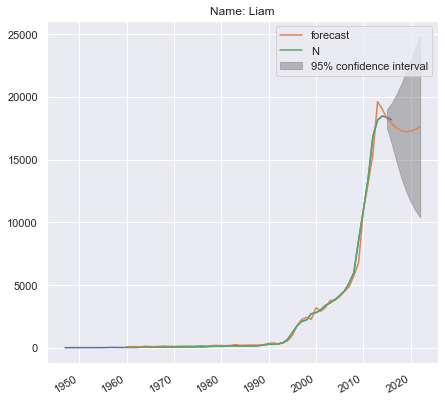

In [220]:
from statsmodels.tsa.arima_model import ARIMA
Param=[(0,-10,3,1,0),(1,-8,2,1,0),(2,-11,3,1,0),(3,-2,4,1,1),(4,-2,3,1,0)]
#Param=[(3,-2,4,1,1)]
L=[]
for (a,b,c,d,e) in Param:

    df_name=df.loc[df.name==Popular_names[a]].groupby('year').sum()
    #df_train=df_name.N.iloc[:-15]

    #df_name.index=df_name.index.year
    df_train=df_name.N.loc[df_name.index>'1950'].iloc[:b]



    model = ARIMA(df_train, order=(c,d,e))  
    res = model.fit(disp=-1)
    
    fig, ax = plt.subplots(figsize=(7,7))
    ax.plot(df_name.index,df_name.N)
    ax.set_title(F'Name: {Popular_names[a]}')
    #res.plot_predict('1882', '2017', ax=ax)
    res.plot_predict('1960','2022', ax=ax)
    L.append(res.predict('1960','2022')[-1])
plt.show()


In [235]:
print(L)

[303.1021936904174, 291.5679008731302, 251.6855028675712, 95.66362269636583, 209.25102196550137]


# Names: Emma, Olivia, Noah


# 2. Counterfactual prediction testing

The [FRED](https://fred.stlouisfed.org) database has economic data useful for this question.

A common method to test the effect of a one-off event is to fit an ARIMA model up to the event, and compare the forecast to the actual data of what happened, then measure the gap between the forecast and the event data.

1. Use GDP and unemployment data with the Counterfactual prediction testing methodology to get an estimate of the magnitude of COVID (around March 2020 as a cutoff date) on these two statistics. Use an ARIMA model which fits best to the pre-COVID time series and compare the output of both. Provide a visualization.

2. Is GDP a unit root process or trend stationary? Use the 2008 and 2020 GDP shocks and statistical tests we've seen in class to provide an argument (it's possible event one says one thing and the other event says the opposite).

In [222]:
url_GDP='https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GDP&scale=left&cosd=1947-01-01&coed=2020-10-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-04-23&revision_date=2021-04-23&nd=1947-01-01'


url_UN='https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=UNRATE&scale=left&cosd=1948-01-01&coed=2021-03-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-04-23&revision_date=2021-04-23&nd=1948-01-01'



#reading the data
df_GDP_initial = pd.read_csv(url_GDP, index_col='DATE', parse_dates=True)
df_GDP=df_GDP_initial.loc[df_GDP_initial.index>'2009-07-01']

df_UN_initial = pd.read_csv(url_UN, index_col='DATE', parse_dates=True)
df_UN=df_UN_initial.loc[df_UN_initial.index>'2009-10-01']


C:\Users\kevin\Anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\kevin\Anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so in

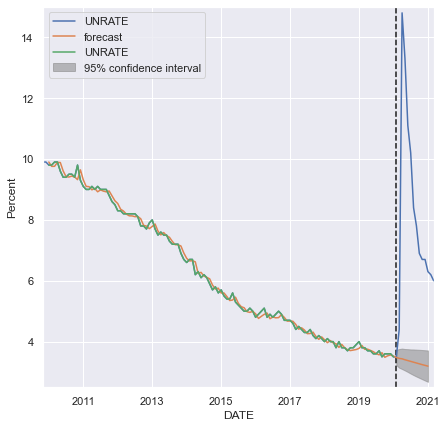

In [228]:
df_GDP=df_GDP.loc[df_GDP.index>'2009-07-01']


df_train=df_UN.loc[df_UN.index<'2020-02-01']


model = ARIMA(df_train, order=(5,2,2))  
res = model.fit(disp=-1)

fig, ax = plt.subplots(figsize=(7,7))
df_UN.plot(ax=ax,legend=False)

ax.set_ylabel('Percent')
#ax.set_title(F'Name: {Popular_names[a]}')
#res.plot_predict('1882', '2017', ax=ax)
ax.vlines('2020-02-01',2,16,linestyles='--',color='k')
ax.set_ylim(2.5,15)
res.plot_predict('2010-01-01','2021-01-01', ax=ax)

#res.plot_predict('2010-02-01','2021-01-01', ax=ax)

plt.show()

C:\Users\kevin\Anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\kevin\Anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so in

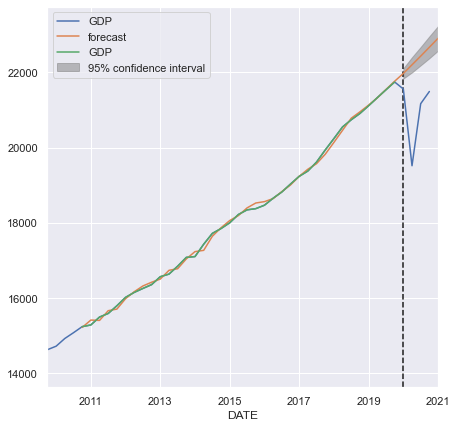

In [224]:
#df_name.index=df_name.index.year
df_train=df_GDP.loc[df_GDP.index<'2020-01-01']


model = ARIMA(df_train, order=(5,2,2))  
res = model.fit(disp=-1)

fig, ax = plt.subplots(figsize=(7,7))
df_GDP.plot(ax=ax,legend='s')
ax.vlines('2020-02-01',df_GDP.min().values-1000,df_GDP.max().values+2000,linestyles='--',color='k')
ax.set_ylim(df_GDP.min().values-1000,df_GDP.max().values+2000)
res.plot_predict('2010-10-01','2021-01-01', ax=ax)

#res.plot_predict('2010-02-01','2021-01-01', ax=ax)
plt.show()

In [225]:
ax.legend()

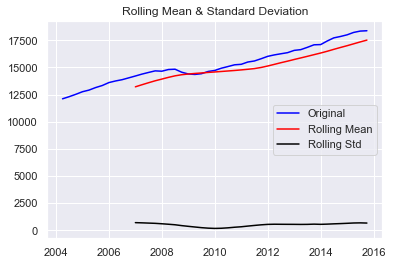

Results of Dickey-Fuller Test:


Test Statistic                 -0.288478
p-value                         0.927120
#Lags Used                      1.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64

In [230]:
from statsmodels.tsa.stattools import adfuller

#2 Is GDP a unit root process or trend stationary? Use the 2008 and 2020 GDP shocks and statistical tests we've seen in class to provide an argument (it's possible event one says one thing and the other event says the opposite)

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput



df_GDP_2009= df_GDP_initial.loc[
                             (df_GDP_initial.index>'2004')&
                             (df_GDP_initial.index<'2016')]

test_stationarity(df_GDP_2009)

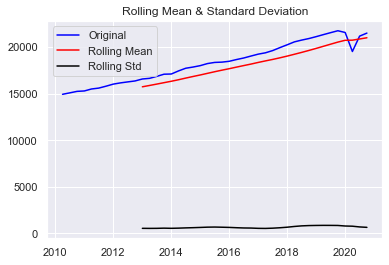

Results of Dickey-Fuller Test:


Test Statistic                 -1.012936
p-value                         0.748517
#Lags Used                      2.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64

In [231]:
#df_GDP_2020=df_GDP_initial.loc[(df_GDP_initial.index>'2010')&(df_GDP_initial.index<'2018')]
df_GDP_2020=df_GDP_initial.loc[(df_GDP_initial.index>'2010')]
test_stationarity(df_GDP_2020)

results 

Fail to reject the null --> unit root is present for 2009 and 2020

rolling mean is time dependent----> not stationary for 2009 and 2020